In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from Inleveropgave2.main import reformatMatrix, printTriangleMatrix

from Inleveropgave2.doolhof.maze import Maze
from Inleveropgave2.doolhof.agent import Agent
from Inleveropgave2.doolhof.policy import Policy

In [3]:
startPos = (2, 0)

doolhof = Maze()
policy = Policy(doolhof)

startStateIndex = doolhof.coordsToIndex(startPos)
startState = doolhof.map[startStateIndex[0]][startStateIndex[1]]

agent = Agent(doolhof, policy, startState)

# Model-Free Prediction

## First-visist MC prediction

### Optimal policy

In [4]:
agent.policy.matrix = [
    [[0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0]],
    [[1, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]],
    [[1, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1]],
    [[0, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 1]]]

values = agent.monteCarloPolicyEvaluation(10000, discount=1)
for row in values:
    print(row)

[38.0, 39.0, 40.0, 0]
[37.0, 38.0, 39.0, 40.0]
[36.0, 37.0, 36.0, 35.0]
[0, 36.0, 35.0, 34.0]


In [5]:
agent.policy.matrix = [
    [[0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0]],
    [[1, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]],
    [[1, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1]],
    [[0, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 1]]]

values = agent.monteCarloPolicyEvaluation(10000, discount=0.9)
for row in values:
    print(row)

[30.5, 35.0, 40.0, 0]
[26.450000000000447, 30.5, 35.0, 40.0]
[22.805000000000188, 26.44999999999814, 22.805000000000266, 19.524499999999843]
[0, 22.805000000000184, 19.524499999999836, 16.572050000000118]


### Random policy

In [6]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.monteCarloPolicyEvaluation(10000, discount=1)
for row in values:
    print(row)

[-14.612244897959183, -11.410540540540541, 0.5484293193717278, 0]
[-13.980592991913747, -16.22377013495864, -13.174526315789473, -4.805042890564076]
[-6.935097989310257, -14.668780384696682, -19.712236470332538, -18.959238401716277]
[0, -8.564396837541443, -17.37824111200214, -19.874958430329233]


In [7]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.monteCarloPolicyEvaluation(10000, discount=0.9)
for row in values:
    print(row)

[-4.8815002695294085, -2.596450841394328, 6.81442022045343, 0]
[-4.95733535569141, -7.203309806946684, -4.823854602195569, 1.7364419876313788]
[-0.4305596154473252, -5.268200980089047, -9.13612071463168, -8.659413773829742]
[0, -1.5516944602515397, -7.12513580442842, -8.456824715795078]


## Tabular

### Optimal policy

In [8]:
agent.policy.matrix = [
    [[0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0]],
    [[1, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]],
    [[1, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1]],
    [[0, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 1]]]

values = agent.tabular(10000, discount=1)
for row in values:
    print(row)

[37.999999999999915, 38.99999999999994, 39.99999999999997, 0]
[36.999999999999886, 37.999999999999915, 38.99999999999994, 39.99999999999997]
[35.99999999999986, 36.999999999999886, 35.99999999999986, 34.99999999999983]
[0, 35.99999999999986, 34.99999999999983, 33.9999999999998]


In [9]:
agent.policy.matrix = [
    [[0, 1, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0], [0, 0, 0, 0]],
    [[1, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]],
    [[1, 1, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 1]],
    [[0, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 1]]]

values = agent.tabular(10000, discount=0.9)
for row in values:
    print(row)

[30.50000000000003, 35.000000000000014, 39.99999999999997, 0]
[26.450000000000045, 30.50000000000003, 35.000000000000014, 39.99999999999997]
[22.805000000000057, 26.450000000000045, 22.805000000000057, 19.524500000000067]
[0, 22.805000000000057, 19.524500000000067, 16.572050000000075]


### Random policy

In [10]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.tabular(10000, discount=1)
for row in values:
    print(row)

[-15.708464186524399, -14.59669450474802, -6.986465736966042, 0]
[-15.94894480781902, -17.321662070074233, -17.388202572729405, -9.219180521312495]
[-7.0174102864849335, -13.391261223759164, -22.185288037529812, -23.71107982738835]
[0, -6.083059679354246, -20.870621709336614, -23.2492736496647]


In [11]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.tabular(10000, discount=0.9)
for row in values:
    print(row)

[-6.810128738965693, -5.329968558293741, 10.547680112530365, 0]
[-5.807186099830382, -8.682271227499292, -7.611828555039493, -5.070295170573651]
[-1.8917886923560834, -5.981515329343762, -8.467544823866291, -9.62594522684687]
[0, 0.204190383371046, -7.476198567024469, -8.620430228418488]


# Model-Free Control

## On-policy first-visit Monte-Carlo Control

### Discount = 1

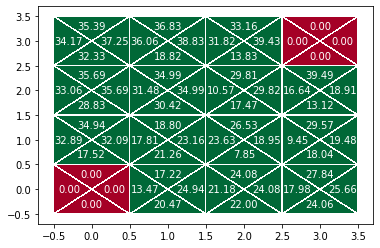

In [12]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.onPolicyFirstVisitMonteCarloControl(episodes=100000, discount=1)
matrix = reformatMatrix(values)
printTriangleMatrix(matrix)

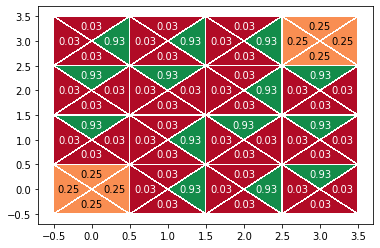

In [13]:
matrix = reformatMatrix(agent.policy.matrix)
printTriangleMatrix(matrix)

### Discount = 0.9

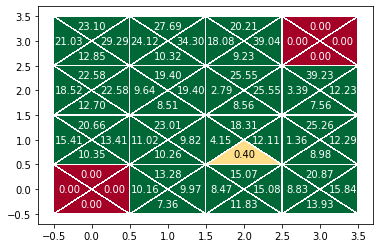

In [14]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.onPolicyFirstVisitMonteCarloControl(episodes=100000, discount=0.9)
matrix = reformatMatrix(values)
printTriangleMatrix(matrix)

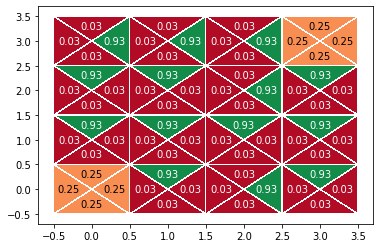

In [15]:
matrix = reformatMatrix(agent.policy.matrix)
printTriangleMatrix(matrix)

## Sarsa

### Discount = 1

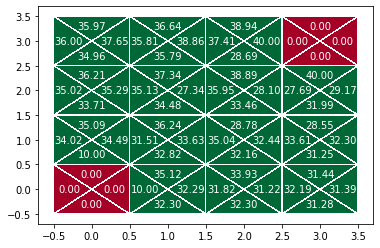

In [16]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.sarsa(episodes=100000, discount=1)
matrix = reformatMatrix(values)
printTriangleMatrix(matrix)

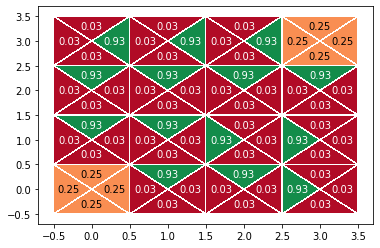

In [17]:
matrix = reformatMatrix(agent.policy.matrix)
printTriangleMatrix(matrix)

### Discount = 0.9

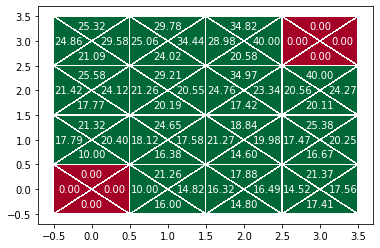

In [18]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.sarsa(episodes=100000, discount=0.9)
matrix = reformatMatrix(values)
printTriangleMatrix(matrix)

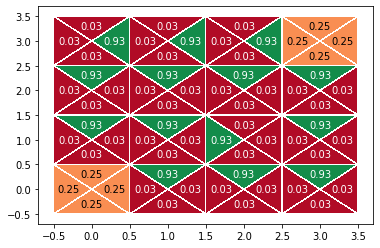

In [19]:
matrix = reformatMatrix(agent.policy.matrix)
printTriangleMatrix(matrix)

## Q-learning

### Discount = 1

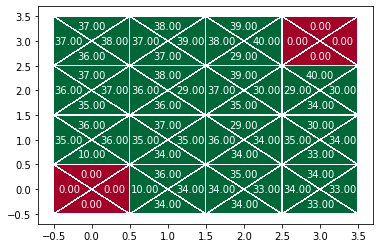

In [20]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.qLearning(episodes=100000, discount=1)
matrix = reformatMatrix(values)
printTriangleMatrix(matrix)

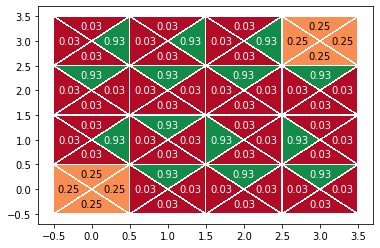

In [21]:
matrix = reformatMatrix(agent.policy.matrix)
printTriangleMatrix(matrix)

### Discount = 0.9

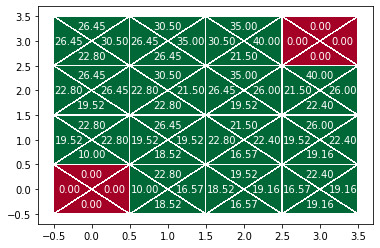

In [22]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

values = agent.qLearning(episodes=100000, discount=0.9)
matrix = reformatMatrix(values)
printTriangleMatrix(matrix)

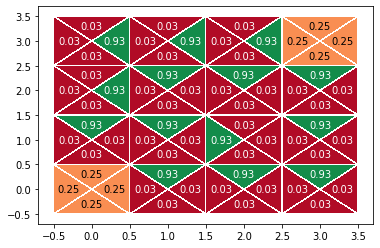

In [23]:
matrix = reformatMatrix(agent.policy.matrix)
printTriangleMatrix(matrix)

## Double Q-learning

### Discount = 1

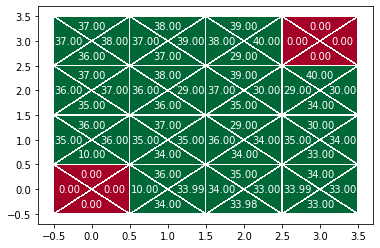

In [24]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

Q1, Q2 = agent.doubleqLearning(episodes=100000, discount=1)
matrix = reformatMatrix(Q1)
printTriangleMatrix(matrix)

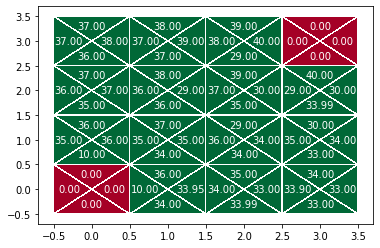

In [25]:
matrix = reformatMatrix(Q2)
printTriangleMatrix(matrix)

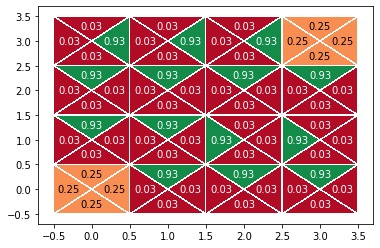

In [26]:
matrix = reformatMatrix(agent.policy.matrix)
printTriangleMatrix(matrix)

### Discount = 0.9

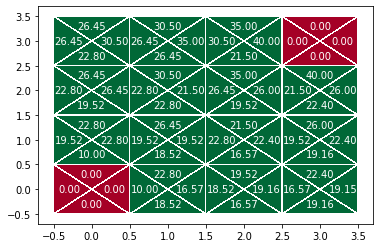

In [27]:
agent.policy.matrix = [
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]],
            [[0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25], [0.25, 0.25, 0.25, 0.25]]]

Q1, Q2 = agent.doubleqLearning(episodes=100000, discount=0.9)
matrix = reformatMatrix(Q1)
printTriangleMatrix(matrix)

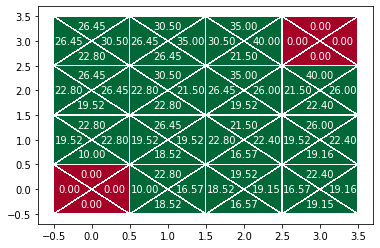

In [28]:
matrix = reformatMatrix(Q2)
printTriangleMatrix(matrix)

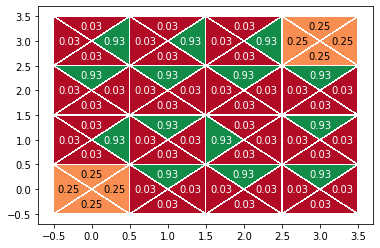

In [29]:
matrix = reformatMatrix(agent.policy.matrix)
printTriangleMatrix(matrix)